In [5]:
import numpy
# import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import Sequential,layers
from keras.layers import Dense, Conv2D, MaxPooling1D, Flatten

getting gpu ready


In [6]:
tf.__version__

'2.10.1'

In [7]:
# import tensorflow as tf

print("TensorFlow version:", tf.__version__)
print("GPU devices:", tf.config.list_physical_devices('GPU'))

TensorFlow version: 2.10.1
GPU devices: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [8]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [9]:
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [10]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

generators

In [11]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = "training_set",
    labels = "inferred",
    label_mode = "int",
    batch_size = 32,
    image_size = (256,256)
)

test_ds = keras.utils.image_dataset_from_directory(
    directory = "test_set",
    labels = "inferred",
    label_mode = "int",
    batch_size = 32,
    image_size = (256,256)
)

Found 8005 files belonging to 2 classes.
Found 2023 files belonging to 2 classes.


In [12]:
for image_batch, label_batch in train_ds.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[1 0 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 0 0]


In [13]:
for label_batch in train_ds.take(1):
    print(label_batch[0].numpy())
    

[[[[ 84.89478    79.89478    75.89478  ]
   [ 79.758316   74.758316   70.758316 ]
   [ 82.07471    77.07471    73.07471  ]
   ...
   [ 95.51367    90.51367    96.51367  ]
   [ 87.51367    84.51367    93.81836  ]
   [ 82.86914    80.86914    93.86914  ]]

  [[ 82.85597    77.85597    73.85597  ]
   [ 71.46123    66.46123    62.461224 ]
   [ 66.663025   61.66302    57.66302  ]
   ...
   [105.43715   100.43715   106.43715  ]
   [ 98.79628    95.79628   105.10097  ]
   [ 95.14453    93.14453   106.14453  ]]

  [[ 66.102325   61.10233    57.10233  ]
   [ 66.11488    61.114887   57.114887 ]
   [ 69.18974    64.18974    60.189743 ]
   ...
   [115.31655   110.31655   116.31655  ]
   [114.99219   111.14453   120.44922  ]
   [111.01053   108.68631   121.84842  ]]

  ...

  [[ 96.84494    94.33127    85.16916  ]
   [100.48633    96.99735    85.83524  ]
   [105.61133    99.18945    87.50203  ]
   ...
   [153.33804   142.33804   148.33804  ]
   [155.6773    144.6773    151.82965  ]
   [139.42188   

dog = 1, cat = 0

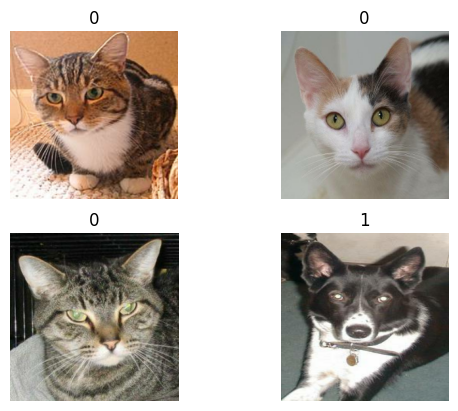

In [14]:
for image_batch, label_batch in train_ds.take(1): #Takes one batch
    for i in range(4):
        ax=plt.subplot(2,2,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(label_batch[i].numpy())
        plt.axis("off")

Normalize

In [15]:
def process(image, label):
    image = tf.cast(image/255. , tf.float32)
    return image, label

train_ds = train_ds.map(process)
test_ds = test_ds.map(process)

TRIED DIFFERENT COMBINATION OF CONV2D AND DENSE LAYERS

building model 1

In [16]:
model_1 = Sequential([
    layers.Conv2D(32,kernel_size=(3,3),padding='valid', activation='relu', input_shape=(256,256,3)),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2,padding='valid'),
    
    layers.Conv2D(64,kernel_size=(3,3),padding='valid', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2,padding='valid'),
    
    layers.Conv2D(128,kernel_size=(3,3),padding='valid', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2,padding='valid'),
    
    layers.Flatten(),
    
    layers.Dense(128, activation='relu'),
    
    layers.Dense(64, activation='relu'),
    
    layers.Dense(1, activation='sigmoid'),
    
])

In [17]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [18]:
model_1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [42]:
histor_1 = model_1.fit(train_ds,epochs=10)

Epoch 1/10
251/251 [==============================] - 36s 140ms/step - loss: 0.6648 - accuracy: 0.5999
Epoch 2/10
251/251 [==============================] - 35s 140ms/step - loss: 0.5878 - accuracy: 0.6904
Epoch 3/10
251/251 [==============================] - 36s 143ms/step - loss: 0.4888 - accuracy: 0.7572
Epoch 4/10
251/251 [==============================] - 38s 148ms/step - loss: 0.3609 - accuracy: 0.8342
Epoch 5/10
251/251 [==============================] - 39s 152ms/step - loss: 0.2174 - accuracy: 0.9073
Epoch 6/10
251/251 [==============================] - 38s 151ms/step - loss: 0.1155 - accuracy: 0.9539
Epoch 7/10
251/251 [==============================] - 39s 152ms/step - loss: 0.0646 - accuracy: 0.9770
Epoch 8/10
251/251 [==============================] - 40s 155ms/step - loss: 0.0660 - accuracy: 0.9788
Epoch 9/10
251/251 [==============================] - 39s 154ms/step - loss: 0.0343 - accuracy: 0.9886
Epoch 10/10
251/251 [==============================] - 40s 158ms/step - l

In [18]:
model_1.evaluate(test_ds)

64/64 [==============================] - 8s 103ms/step - loss: 1.7716 - accuracy: 0.6886


[1.7716056108474731, 0.6885812878608704]

Building model - 2

In [19]:
model_2 = Sequential([
    layers.Conv2D(32,kernel_size=(3,3),padding='valid', activation='relu', input_shape=(256,256,3)),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2,padding='valid'),
    
    layers.Conv2D(32,kernel_size=(3,3),padding='valid', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2,padding='valid'),
    
    layers.Conv2D(32,kernel_size=(3,3),padding='valid', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2,padding='valid'),
    
    layers.Flatten(),
    
    layers.Dense(32, activation='relu'),
    
    layers.Dense(64, activation='relu'),
    
    layers.Dense(1, activation='sigmoid'),
    
])

In [20]:
model_2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [21]:
histor_2 = model_2.fit(train_ds,epochs=10)

Epoch 1/10
251/251 [==============================] - 26s 96ms/step - loss: 0.6807 - accuracy: 0.5543
Epoch 2/10
251/251 [==============================] - 26s 104ms/step - loss: 0.5850 - accuracy: 0.6874
Epoch 3/10
251/251 [==============================] - 25s 100ms/step - loss: 0.5000 - accuracy: 0.7550
Epoch 4/10
251/251 [==============================] - 25s 97ms/step - loss: 0.4078 - accuracy: 0.8127
Epoch 5/10
251/251 [==============================] - 24s 95ms/step - loss: 0.3312 - accuracy: 0.8557
Epoch 6/10
251/251 [==============================] - 24s 94ms/step - loss: 0.2376 - accuracy: 0.9018
Epoch 7/10
251/251 [==============================] - 24s 94ms/step - loss: 0.1635 - accuracy: 0.9344
Epoch 8/10
251/251 [==============================] - 25s 99ms/step - loss: 0.1088 - accuracy: 0.9525
Epoch 9/10
251/251 [==============================] - 25s 97ms/step - loss: 0.0834 - accuracy: 0.9646
Epoch 10/10
251/251 [==============================] - 25s 98ms/step - loss: 0.0

In [22]:
model_2.evaluate(test_ds)

64/64 [==============================] - 4s 56ms/step - loss: 1.3237 - accuracy: 0.7420


[1.323651909828186, 0.7419673800468445]

Building model 3

In [20]:
model_3 = Sequential([
    layers.Conv2D(32,kernel_size=(3,3),padding='valid', activation='relu', input_shape=(256,256,3)),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2,padding='valid'),
    
    layers.Conv2D(32,kernel_size=(3,3),padding='valid', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2,padding='valid'),
    
    layers.Conv2D(32,kernel_size=(3,3),padding='valid', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2,padding='valid'),
    
    layers.Conv2D(32,kernel_size=(3,3),padding='valid', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2,padding='valid'),
    
    layers.Conv2D(32,kernel_size=(3,3),padding='valid', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2,padding='valid'),
    
    
    layers.Flatten(),
    
    layers.Dense(32, activation='relu'),
    
    layers.Dense(64, activation='relu'),
    
    layers.Dense(1, activation='sigmoid'),
    
])

model_3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [21]:
histor_3 = model_3.fit(train_ds,epochs=10)

Epoch 1/10
251/251 [==============================] - 29s 106ms/step - loss: 0.6892 - accuracy: 0.5233
Epoch 2/10
251/251 [==============================] - 25s 99ms/step - loss: 0.6408 - accuracy: 0.6167
Epoch 3/10
251/251 [==============================] - 25s 100ms/step - loss: 0.5427 - accuracy: 0.7238
Epoch 4/10
251/251 [==============================] - 25s 99ms/step - loss: 0.4978 - accuracy: 0.7577
Epoch 5/10
251/251 [==============================] - 27s 105ms/step - loss: 0.4391 - accuracy: 0.7961
Epoch 6/10
251/251 [==============================] - 26s 100ms/step - loss: 0.3964 - accuracy: 0.8182
Epoch 7/10
251/251 [==============================] - 25s 99ms/step - loss: 0.3615 - accuracy: 0.8340
Epoch 8/10
251/251 [==============================] - 27s 104ms/step - loss: 0.3133 - accuracy: 0.8612
Epoch 9/10
251/251 [==============================] - 25s 98ms/step - loss: 0.2689 - accuracy: 0.8848
Epoch 10/10
251/251 [==============================] - 26s 103ms/step - loss:

In [22]:
model_3.evaluate(test_ds)

64/64 [==============================] - 6s 65ms/step - loss: 0.4518 - accuracy: 0.8216


[0.451829195022583, 0.8215521574020386]

MODEL 3 GAVE GOOD ACCURACY ON TEST DATASET THAN OTHERS

PERFORMED GOOD ON UNSEEN DATA

In [23]:
y_predict = model_3.predict(test_ds)

64/64 [==============================] - 5s 60ms/step


In [31]:
import cv2

In [28]:
test_img1 = cv2.imread('dog.jpeg')

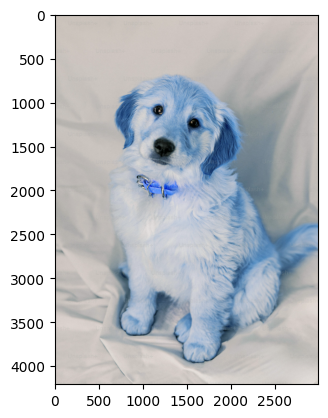

In [29]:
plt.imshow(test_img1)

In [30]:
test_img1.shape

(4206, 3000, 3)

In [32]:
test_img1 = cv2.resize(test_img1,(256,256))

In [33]:
test_input = test_img1.reshape((1,256,256,3))

In [34]:
model_3.predict(test_input)

1/1 [==============================] - 1s 888ms/step


array([[1.]], dtype=float32)

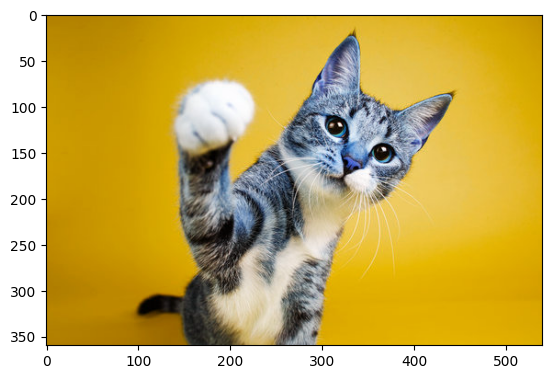

In [38]:
test_img2 = cv2.imread('cat.jpg')
plt.imshow(test_img1)

In [39]:
test_img2.shape

(360, 540, 3)

In [40]:
test_img2 = cv2.resize(test_img2,(256,256))
test_input1 = test_img2.reshape((1,256,256,3))

In [43]:
model_3.predict(test_input1)

1/1 [==============================] - 0s 422ms/step


array([[0.]], dtype=float32)

In [45]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(model_3, file)

INFO:tensorflow:Assets written to: ram://a47b1411-5e51-4b71-a4ee-54acbafa333c/assets


INFO:tensorflow:Assets written to: ram://a47b1411-5e51-4b71-a4ee-54acbafa333c/assets


In [25]:
model_3.evaluate(test_ds)

64/64 [==============================] - 5s 54ms/step - loss: 0.4817 - accuracy: 0.7909


[0.48166748881340027, 0.7909045815467834]

Building model - 4


In [26]:
model_4 = Sequential([
    layers.Conv2D(64,kernel_size=(3,3),padding='valid', activation='relu', input_shape=(256,256,3)),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2,padding='valid'),
    
    layers.Conv2D(64,kernel_size=(3,3),padding='valid', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2,padding='valid'),
    
    layers.Conv2D(64,kernel_size=(3,3),padding='valid', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2,padding='valid'),
    
    layers.Conv2D(64,kernel_size=(3,3),padding='valid', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2,padding='valid'),
    
    layers.Conv2D(64,kernel_size=(3,3),padding='valid', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2,padding='valid'),
    
    
    layers.Flatten(),
    
    layers.Dense(64, activation='relu'),
    
    layers.Dense(32, activation='relu'),
    
    layers.Dense(1, activation='sigmoid'),
    
])

model_4.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [27]:
histor_4 = model_4.fit(train_ds,epochs=10)

Epoch 1/10
251/251 [==============================] - 43s 158ms/step - loss: 0.6903 - accuracy: 0.5257
Epoch 2/10
251/251 [==============================] - 38s 152ms/step - loss: 0.6293 - accuracy: 0.6475
Epoch 3/10
251/251 [==============================] - 38s 149ms/step - loss: 0.5830 - accuracy: 0.6972
Epoch 4/10
251/251 [==============================] - 36s 143ms/step - loss: 0.5381 - accuracy: 0.7263
Epoch 5/10
251/251 [==============================] - 38s 148ms/step - loss: 0.4813 - accuracy: 0.7705
Epoch 6/10
251/251 [==============================] - 37s 148ms/step - loss: 0.4269 - accuracy: 0.8005
Epoch 7/10
251/251 [==============================] - 38s 149ms/step - loss: 0.3731 - accuracy: 0.8301
Epoch 8/10
251/251 [==============================] - 37s 147ms/step - loss: 0.3078 - accuracy: 0.8672
Epoch 9/10
251/251 [==============================] - 37s 147ms/step - loss: 0.2529 - accuracy: 0.8938
Epoch 10/10
251/251 [==============================] - 37s 146ms/step - l

In [28]:
model_4.evaluate(test_ds)

64/64 [==============================] - 6s 78ms/step - loss: 0.6479 - accuracy: 0.8146


[0.6479166150093079, 0.8146317601203918]

Building model - 5


In [30]:
model_5 = Sequential([
    layers.Conv2D(32,kernel_size=(3,3),padding='valid', activation='relu', input_shape=(256,256,3)),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2,padding='valid'),
    
    layers.Conv2D(32,kernel_size=(3,3),padding='valid', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2,padding='valid'),
    
    layers.Conv2D(32,kernel_size=(3,3),padding='valid', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2,padding='valid'),
    
    layers.Conv2D(32,kernel_size=(3,3),padding='valid', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2,padding='valid'),
    
    layers.Conv2D(32,kernel_size=(3,3),padding='valid', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2,padding='valid'),
    
    
    layers.Flatten(),
    
    layers.Dense(32, activation='relu'),
    
    layers.Dense(64, activation='relu'),
    
    layers.Dense(32, activation='relu'),
    
    layers.Dense(1, activation='sigmoid'),
    
])

model_5.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [31]:
histor_5 = model_5.fit(train_ds, epochs=10)

Epoch 1/10
251/251 [==============================] - 26s 99ms/step - loss: 0.6934 - accuracy: 0.5017
Epoch 2/10
251/251 [==============================] - 24s 95ms/step - loss: 0.6863 - accuracy: 0.5380
Epoch 3/10
251/251 [==============================] - 24s 95ms/step - loss: 0.6822 - accuracy: 0.5659
Epoch 4/10
251/251 [==============================] - 24s 95ms/step - loss: 0.6411 - accuracy: 0.6299
Epoch 5/10
251/251 [==============================] - 24s 96ms/step - loss: 0.5755 - accuracy: 0.6981
Epoch 6/10
251/251 [==============================] - 24s 95ms/step - loss: 0.5183 - accuracy: 0.7379
Epoch 7/10
251/251 [==============================] - 24s 96ms/step - loss: 0.4793 - accuracy: 0.7619
Epoch 8/10
251/251 [==============================] - 24s 96ms/step - loss: 0.4246 - accuracy: 0.8006
Epoch 9/10
251/251 [==============================] - 24s 95ms/step - loss: 0.3804 - accuracy: 0.8194
Epoch 10/10
251/251 [==============================] - 24s 95ms/step - loss: 0.337

In [32]:
model_5.evaluate(test_ds)

64/64 [==============================] - 5s 61ms/step - loss: 0.5306 - accuracy: 0.7761


[0.5305614471435547, 0.7760751247406006]

Building model - 6

In [3]:
model_6 = Sequential([
    layers.Conv2D(32,kernel_size=(3,3),padding='valid', activation='relu', input_shape=(256,256,3)),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2,padding='valid'),
    
    layers.Conv2D(32,kernel_size=(3,3),padding='valid', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2,padding='valid'),
    
    layers.Conv2D(32,kernel_size=(3,3),padding='valid', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2,padding='valid'),
    
    layers.Conv2D(32,kernel_size=(3,3),padding='valid', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2,padding='valid'),
    
    layers.Conv2D(32,kernel_size=(3,3),padding='valid', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2,padding='valid'),
    
    
    layers.Flatten(),
    
    layers.Dense(32, activation='relu'),
    
    layers.Dense(64, activation='relu'),
    
    # layers.Dense(32, activation='relu'),
    
    layers.Dense(1, activation='sigmoid'),
    
])

model_6.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

NameError: name 'Sequential' is not defined

In [ ]:
histor_6 = model_6.fit(train_ds, epochs=10)

Epoch 1/10
251/251 [==============================] - 26s 99ms/step - loss: 0.6935 - accuracy: 0.4972
Epoch 2/10
251/251 [==============================] - 24s 95ms/step - loss: 0.6818 - accuracy: 0.5417
Epoch 3/10
251/251 [==============================] - 24s 94ms/step - loss: 0.6499 - accuracy: 0.5975
Epoch 4/10
251/251 [==============================] - 24s 95ms/step - loss: 0.6166 - accuracy: 0.6425
Epoch 5/10
251/251 [==============================] - 24s 95ms/step - loss: 0.5740 - accuracy: 0.6908
Epoch 6/10
251/251 [==============================] - 24s 95ms/step - loss: 0.5123 - accuracy: 0.7424
Epoch 7/10
251/251 [==============================] - 24s 96ms/step - loss: 0.4607 - accuracy: 0.7791
Epoch 8/10
251/251 [==============================] - 24s 95ms/step - loss: 0.4073 - accuracy: 0.8079
Epoch 9/10
251/251 [==============================] - 24s 96ms/step - loss: 0.3697 - accuracy: 0.8332
Epoch 10/10
251/251 [==============================] - 24s 96ms/step - loss: 0.332

In [41]:
model_6.evaluate(test_ds)

64/64 [==============================] - 4s 58ms/step - loss: 0.9683 - accuracy: 0.8319


[0.9683220982551575, 0.831932783126831]

In [ ]:
model_6.evaluate(test_ds)

64/64 [==============================] - 4s 61ms/step - loss: 0.4209 - accuracy: 0.8151


[0.4208996891975403, 0.8151260614395142]

Building model - 7

In [36]:
model_7 = Sequential([
    layers.Conv2D(64,kernel_size=(3,3),padding='valid', activation='relu', input_shape=(256,256,3)),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2,padding='valid'),
    
    layers.Conv2D(64,kernel_size=(3,3),padding='valid', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2,padding='valid'),
    
    
    
    layers.Flatten(),
    
    layers.Dense(62, activation='relu'),
    
    layers.Dense(32, activation='relu'),
    
    layers.Dense(16, activation='relu'),
    
    layers.Dense(1, activation='sigmoid'),
    
])

model_7.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [38]:
history_7 = model_7.fit(train_ds, epochs=10)

Epoch 1/10
251/251 [==============================] - 62s 237ms/step - loss: 0.7073 - accuracy: 0.5534
Epoch 2/10
251/251 [==============================] - 65s 259ms/step - loss: 0.6142 - accuracy: 0.6657
Epoch 3/10
251/251 [==============================] - 65s 257ms/step - loss: 0.4747 - accuracy: 0.7783
Epoch 4/10
251/251 [==============================] - 67s 267ms/step - loss: 0.2880 - accuracy: 0.8782
Epoch 5/10
251/251 [==============================] - 67s 264ms/step - loss: 0.1441 - accuracy: 0.9452
Epoch 6/10
251/251 [==============================] - 65s 255ms/step - loss: 0.1075 - accuracy: 0.9630
Epoch 7/10
251/251 [==============================] - 66s 262ms/step - loss: 0.0630 - accuracy: 0.9804
Epoch 8/10
251/251 [==============================] - 67s 265ms/step - loss: 0.0378 - accuracy: 0.9884
Epoch 9/10
251/251 [==============================] - 61s 240ms/step - loss: 0.0240 - accuracy: 0.9933
Epoch 10/10
251/251 [==============================] - 59s 234ms/step - l

In [39]:
model_7.evaluate(test_ds)

64/64 [==============================] - 5s 71ms/step - loss: 2.2789 - accuracy: 0.6619


[2.2788798809051514, 0.6618883013725281]